<b>1) En un histograma, visualizar el GDP per Capita de cada país. Bonus: ordenar el histograma en orden decreciente.</b>

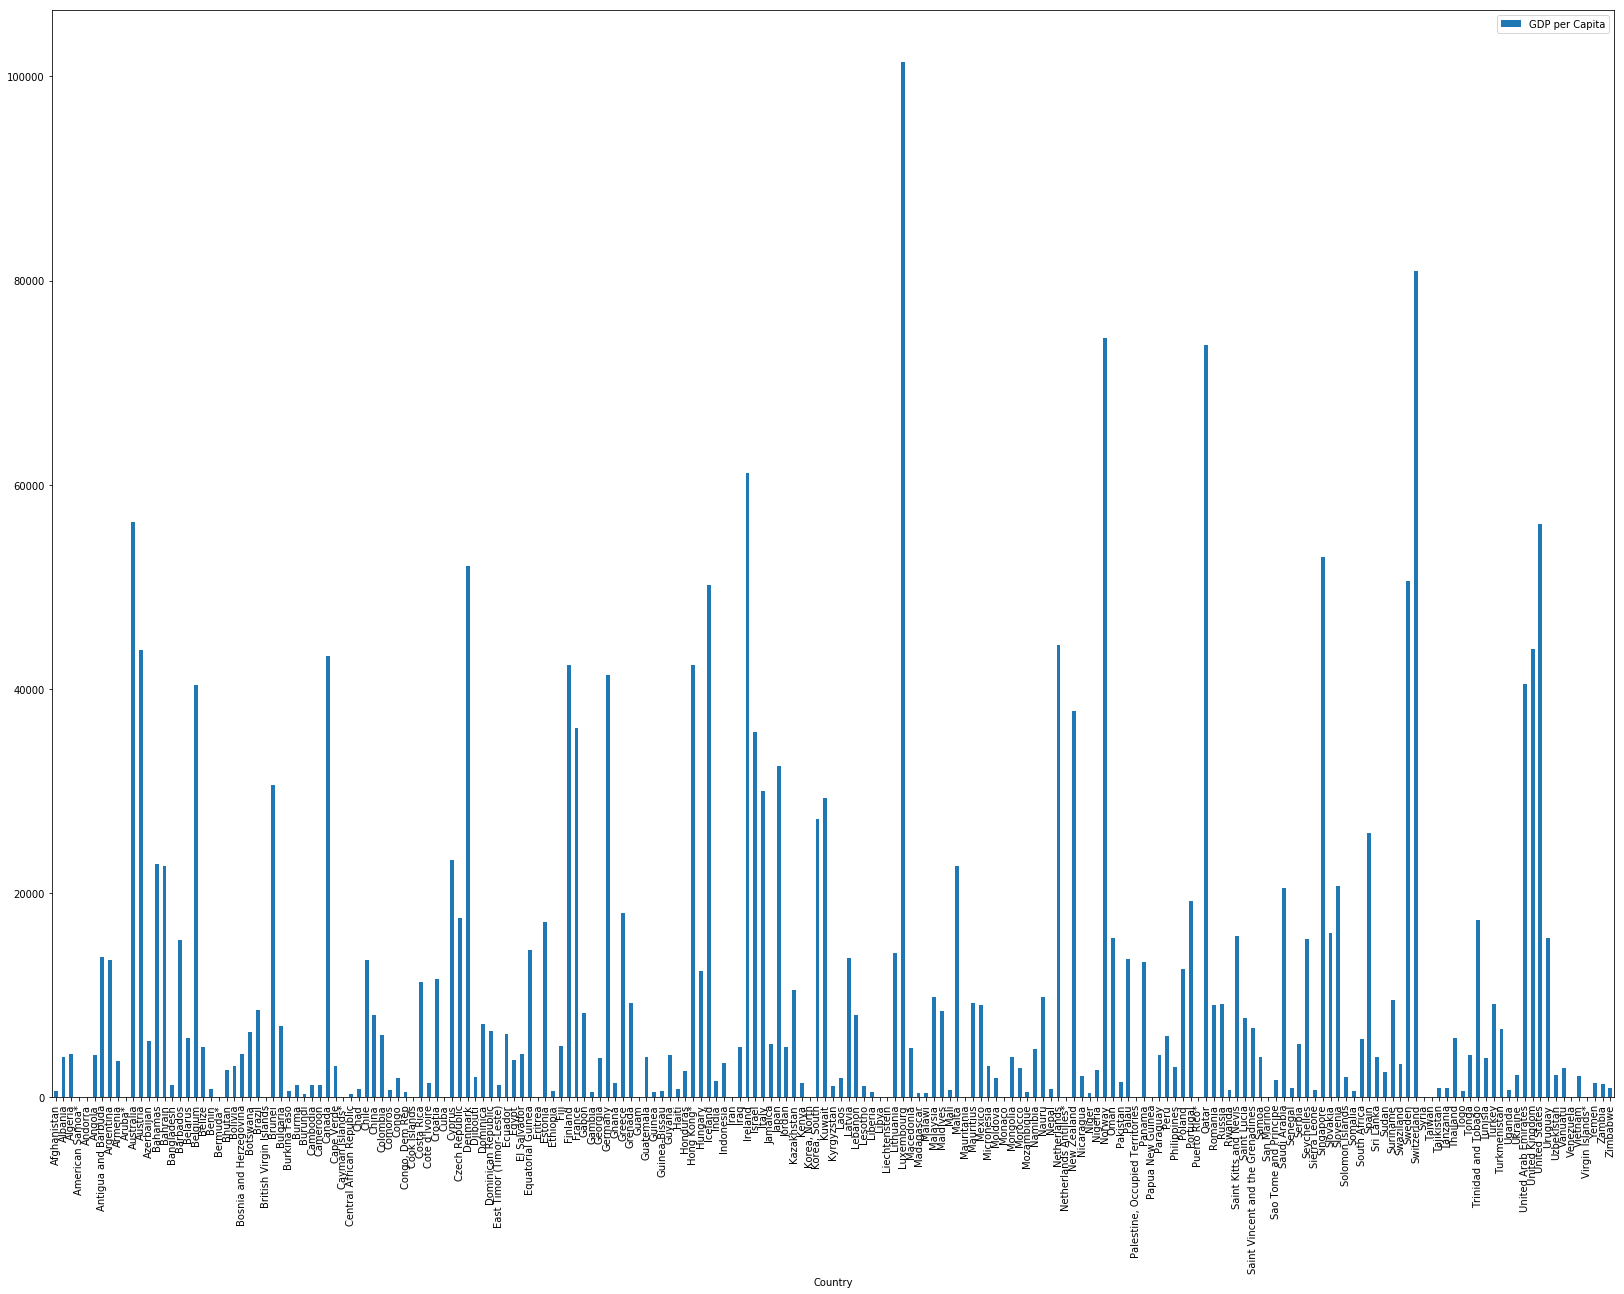

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
dictionary=pd.read_csv('dictionary.csv')
dic=dictionary[['Country','GDP per Capita']]
plt.rcParams['figure.figsize']=(28,20)
dic.groupby('Country').mean().plot(kind="bar",stacked=True) #Esta muestra el nombre de las barras
#dic.plot(kind="hist",stacked=True) #esta no

<b>2) ¿Cuál es el número de medalla por cada país, sin diferenciar el tipo de medalla, en los juegos de verano? Visualizar en un histograma. </b>

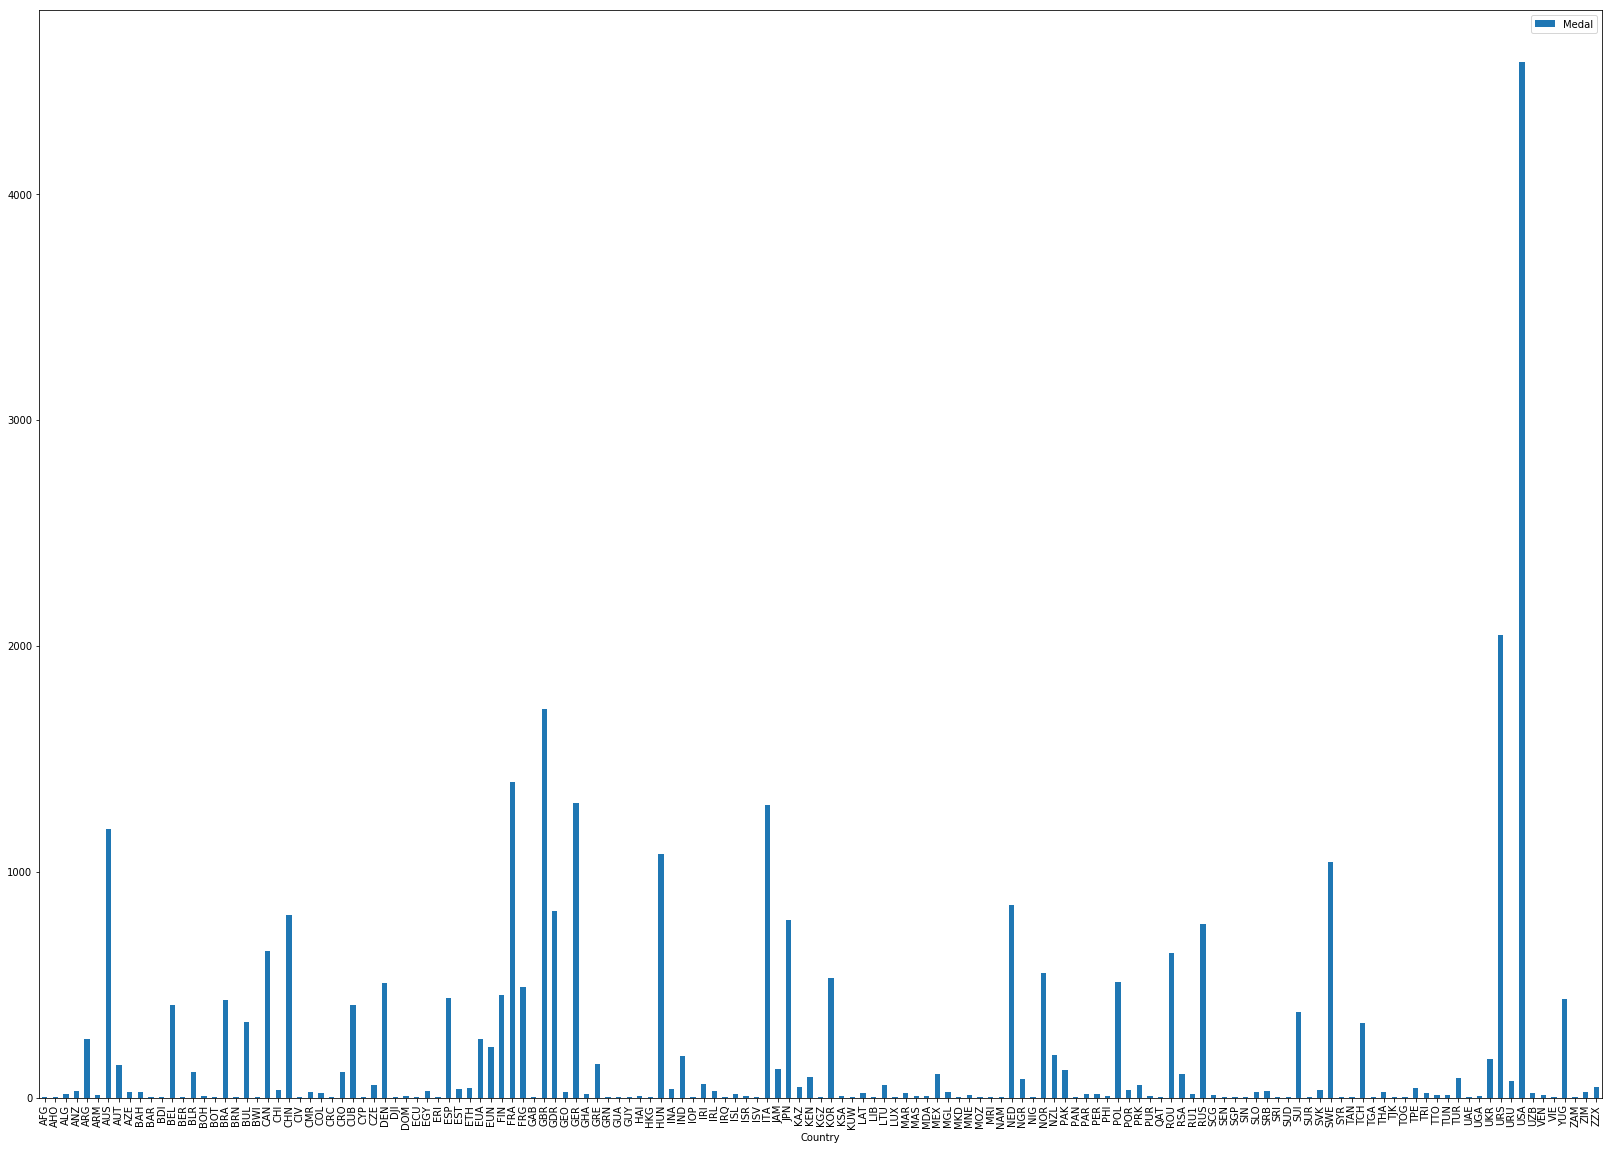

In [23]:
summer=pd.read_csv('summer.csv')
medals=summer['Medal']
country=summer['Country']
ctmedal=medals.str.contains('')
nmedal=pd.concat([country, ctmedal], axis=1)
nmedal.groupby('Country').aggregate(sum).plot(kind="bar",stacked=True)

<b>3) ¿Cuál es el número de medalla por cada país, diferenciando el color de la medalla, en los juegos de verano? Visualizar en un histograma.</b>

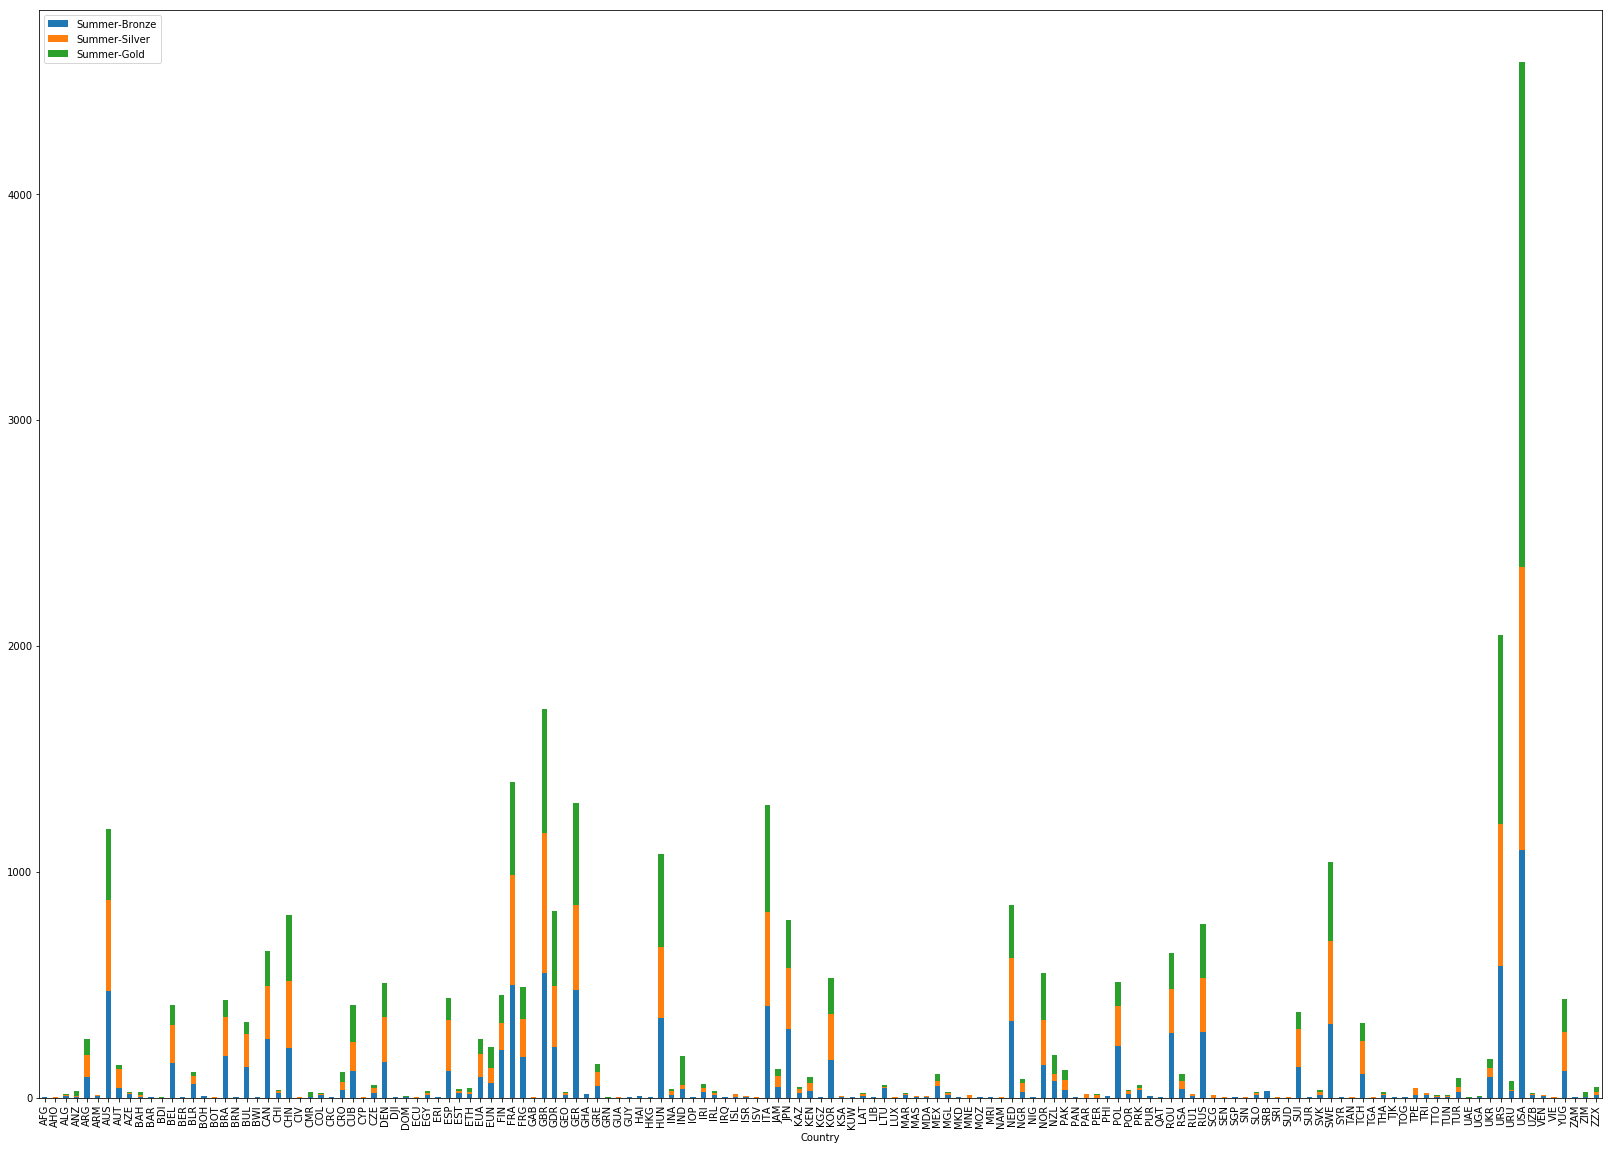

In [33]:
gmedal=medals.str.contains('Gold')
smedal=medals.str.contains('Silver')
bmedal=medals.str.contains('Bronze')
gcountry=pd.concat([country,gmedal], axis=1)
gcountry=gcountry.groupby('Country').aggregate(sum)
scountry=pd.concat([country,smedal], axis=1)
scountry=scountry.groupby('Country').aggregate(sum)
bcountry=pd.concat([country,bmedal], axis=1)
bcountry=bcountry.groupby('Country').aggregate(sum)
fcountry=pd.merge(bcountry,scountry,on='Country')
fcountry=pd.merge(fcountry,gcountry,on='Country')
fcountry=fcountry.rename(index=str, columns={'Medal_x':'Summer-Bronze','Medal_y':'Summer-Silver','Medal':'Summer-Gold'})
fcountry.groupby('Country').mean().plot(kind='Bar',stacked=True)

<b>4) ¿Cuál es el número de medalla por cada país, diferenciando el color de la medalla, en los juegos de verano y invierno? Visualizar en un mismo histograma.</b>

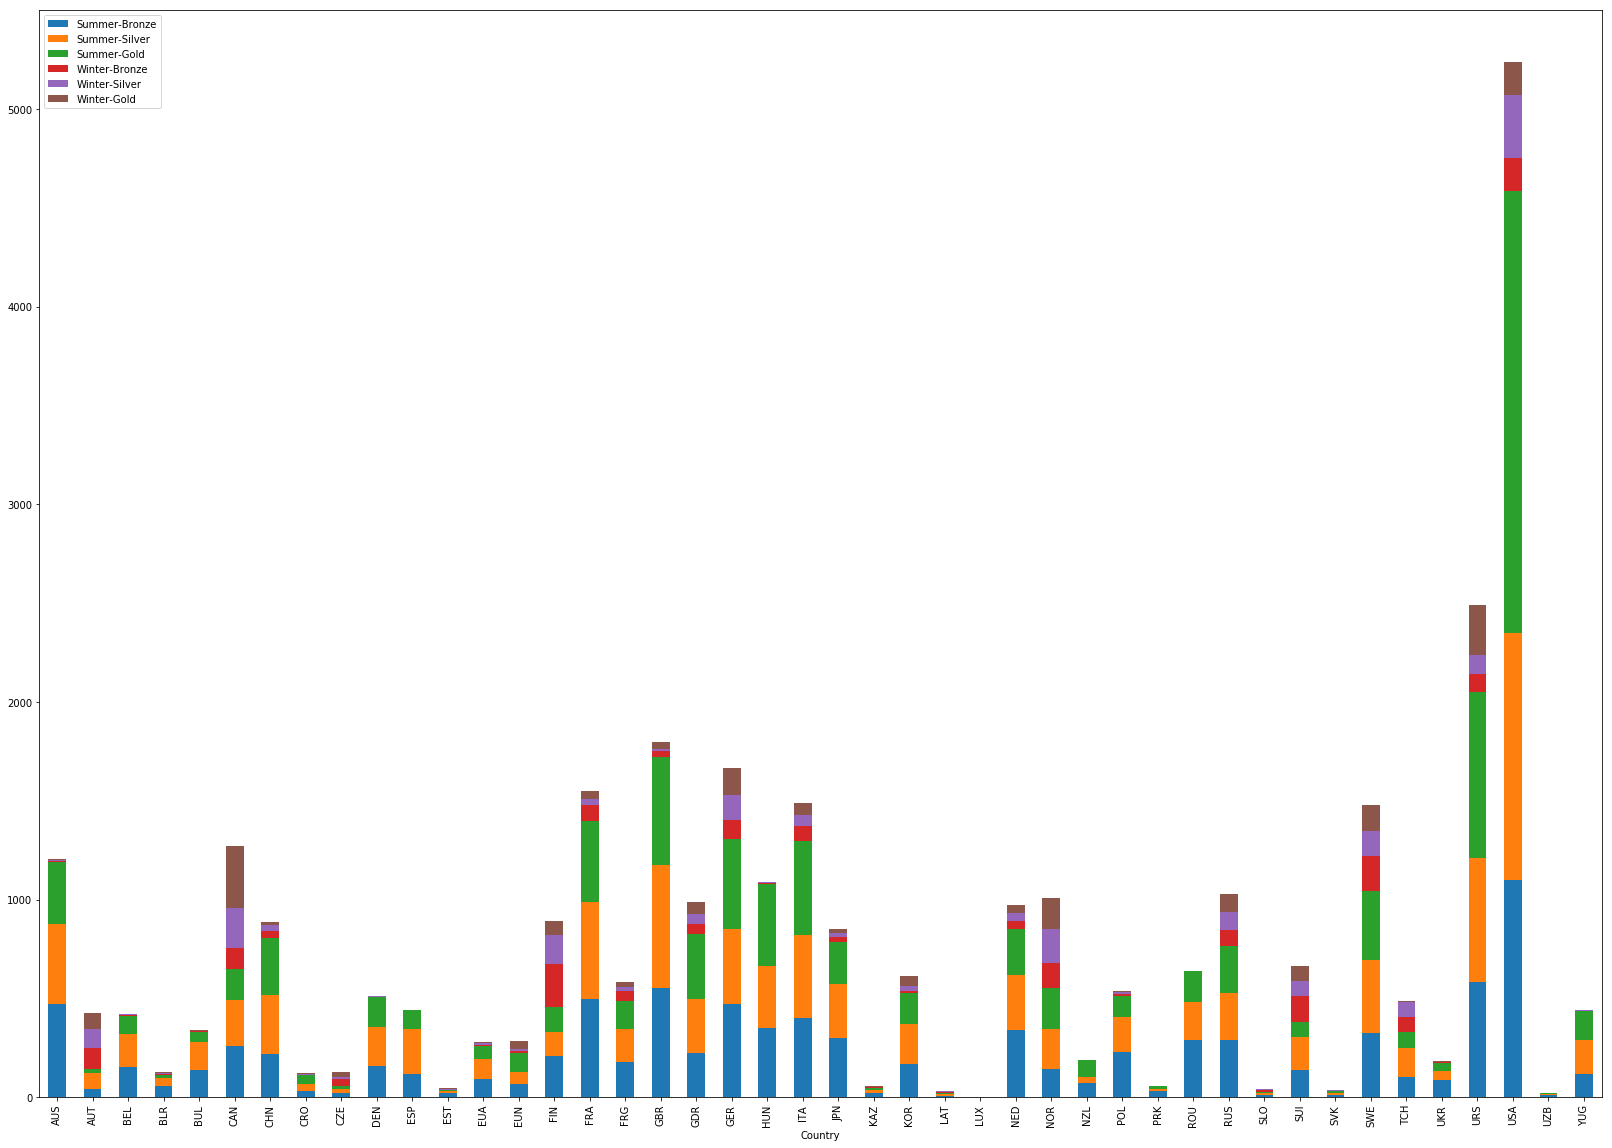

In [34]:
winter=pd.read_csv('winter.csv')
wmedals=winter['Medal']
wcountry=winter['Country']
wgmedal=wmedals.str.contains('Gold')
wsmedal=wmedals.str.contains('Silver')
wbmedal=wmedals.str.contains('Bronze')
wgcountry=pd.concat([wcountry,wgmedal], axis=1)
wgcountry=wgcountry.groupby('Country').aggregate(sum)
wscountry=pd.concat([wcountry,wsmedal], axis=1)
wscountry=wscountry.groupby('Country').aggregate(sum)
wbcountry=pd.concat([wcountry,wbmedal], axis=1)
wbcountry=wbcountry.groupby('Country').aggregate(sum)
wfcountry=pd.merge(wbcountry,wscountry,on='Country')
wfcountry=pd.merge(wfcountry,wgcountry,on='Country')
wfcountry=wfcountry.rename(index=str, columns={'Medal_x':'Winter-Bronze','Medal_y':'Winter-Silver','Medal':'Winter-Gold'})
fcountry=pd.merge(fcountry,wfcountry,on='Country')
fcountry.groupby('Country').mean().plot(kind='Bar',stacked=True)


<b>5) En un scatter plot, mostrar cuál es la relación entre la variable GDP per Capita y el número de medalla total obtenido por cada país. Bonus: Mostrar la recta de regresión y/o calcular el coeficiente de correlación.
 </b>

In [49]:
dic=dictionary[['Code','GDP per Capita']]
dic=dic.rename(index=str, columns={'Code':'Country'})
scpt=pd.merge(dic,fcountry,on='Country')

